In [ ]:
# Import PyDrive and associated libraries
# This only needs to be done once per notebook
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
# This only needs to be done once per notebook
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


file_id = '1zeDj29SCv16HQa1o85Xb-eZrXCKwT6pZ' # Check your own ID in GDrive
downloaded = drive.CreateFile({'id': file_id})

# Save file in Colab memory
downloaded.GetContentFile('tweets.csv')  

In [ ]:
pip install contractions emoji

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
import re,nltk,contractions,emoji 
sns.set_style('dark')
from wordcloud import WordCloud
from textblob import TextBlob

In [ ]:
df = pd.read_csv('tweets.csv',
                 lineterminator='\n')


In [ ]:
# Performing VADER Sentiment Analysis
import nltk
nltk.download('vader_lexicon') # Download the VADER lexicon
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Obtaining NLTK scores
df['VScore'] = df['Clean Text'].apply(lambda x: sia.polarity_scores(x))

# Obtaining NLTK compound score
df['VComp'] = df['VScore'].apply(lambda score_dict: score_dict['compound'])

# Set threshold to define neutral sentiment
neutral_thresh = 0.05

# Categorize scores into the sentiments of positive, neutral or negative
df['Sentiment'] = df['VComp'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
import networkx as nx
import itertools, collections
from nltk import bigrams
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_stopwords_to_add = ['covid19', 'covid','vaccine', 'covid-19', '19', 'vaccines', 'vaccine.','vaccine?', '-', '.']
stop_words.extend(new_stopwords_to_add)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Check d[0].items() for understanding more about graph plot

def BigramsAnalysis(sentiment):
  l_words = df[df["Sentiment"]==sentiment]["Clean Text"].tolist()
  words_in_tweet = [tweet.split() for tweet in l_words]
  words_lemmatized = [[word for word in tweet_words]
              for tweet_words in words_in_tweet]
  tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_lemmatized]
  terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw if tweet]
  bigrams_list = list(itertools.chain(*terms_bigram))
  bigram_counts = collections.Counter(bigrams_list)
  bigram_df = pd.DataFrame(bigram_counts.most_common(50),
                             columns=['bigram', 'count'])
  d = bigram_df.set_index('bigram').T.to_dict('records')
  G = nx.Graph()
  for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v))
  fig, ax = plt.subplots(figsize=(14, 10))

  pos = nx.spring_layout(G, k=2)

  # Plot networks
  nx.draw_networkx(G, pos,
                  font_size=16,
                  width=3,
                  edge_color='grey',
                  node_color='purple',
                  with_labels = False,
                  ax=ax)

  # Create offset labels
  for key, value in pos.items():
      x, y = value[0]+.100, value[1]+.025
      ax.text(x, y,
              s=key,
              bbox=dict(facecolor='red', alpha=0.15),
              horizontalalignment='center', fontsize=13)
      
  plt.show()
  return bigram_df

def Search(keywords, is_df=False):
  pd.set_option('display.max_colwidth', 400)
  if not is_df:
    result = df[df["Clean Text"].str.contains(keywords)]["Text"]
  else:
    result = df[df["Clean Text"].str.contains(keywords)].sort_values(by='Datetime')
  return result

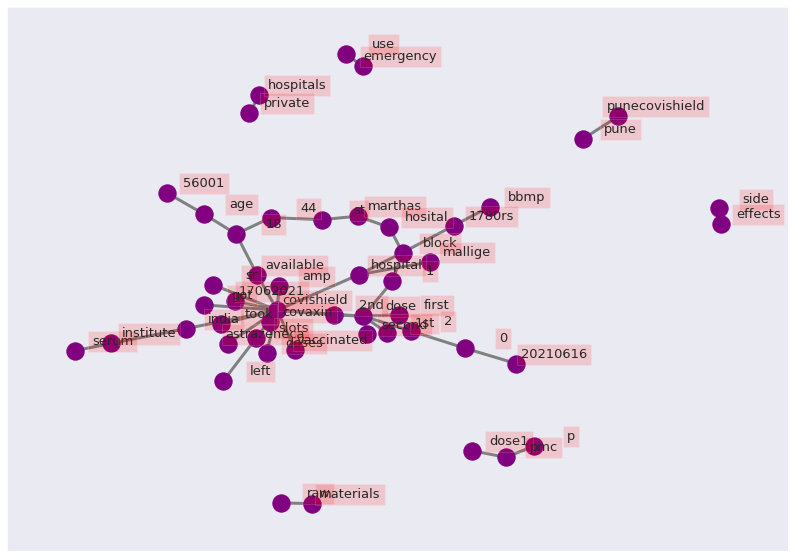

In [ ]:
input_ = 'Negative'
neg = BigramsAnalysis(input_)

In [ ]:
neg

,bigram,count
0,"(2nd, dose)",4685
1,"(dose, covishield)",4552
2,"(covishield, covaxin)",3233
3,"(dose, 2)",3167
4,"(dose, 1)",3135
5,"(second, dose)",2902
6,"(covishield, available)",2824
7,"(age, 18)",2667
8,"(covaxin, covishield)",2645
9,"(block, 1)",2591


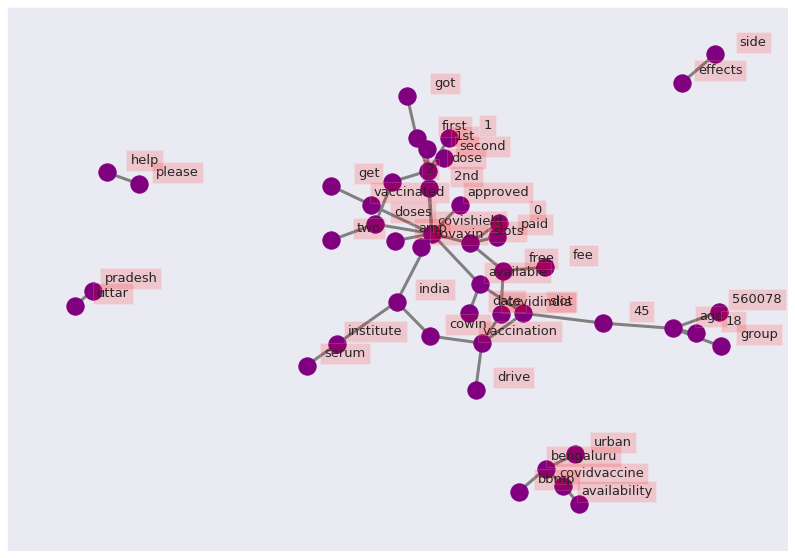

In [ ]:
input_ = 'Positive'
pos = BigramsAnalysis(input_)

In [ ]:
pos

,bigram,count
0,"(dose, covishield)",13166
1,"(2nd, dose)",9554
2,"(second, dose)",7945
3,"(covishield, covaxin)",7458
4,"(slots, covishield)",7368
5,"(covaxin, covishield)",6387
6,"(first, dose)",6302
7,"(1st, dose)",5477
8,"(doses, covishield)",4096
9,"(age, 18)",4095


In [ ]:
Search("strong immune")

20756                                         @RogueRad @paimadhu #Covishield Reliable tech, strong immune response, excellent protection. No match to pfizer/ moderna, but much better than 50%. \n#Covaxin results awaited, safe tech, generally provides strong immunity and is very very cheap.  Could be the lynchpin for pandemic control.
28127                                                                                       Following recommendations from the WHO, Covishield-AstraZeneca dosing intervals have been extended from 4 to 8 weeks.\nTo increase vaccine efficiency and produce a strong immune response.\n\n#Commit4Bahrain\n#TeamBahrain https://t.co/dkISfvXxx9
28130                                                                                       Following recommendations from the WHO, Covishield-AstraZeneca dosing intervals have been extended from 4 to 8 weeks.\nTo increase vaccine efficiency and produce a strong immune response.\n\n#Commit4Bahrain\n#TeamBahrain https://t.co/

In [ ]:
df1 = Search("natural immunity", is_df=True)
df1[(df1["Datetime"] == '2021-09-10')]

,Unnamed: 0,Datetime,Text,Username,Like Count,Display Name,Clean Text,VScore,VComp,Sentiment


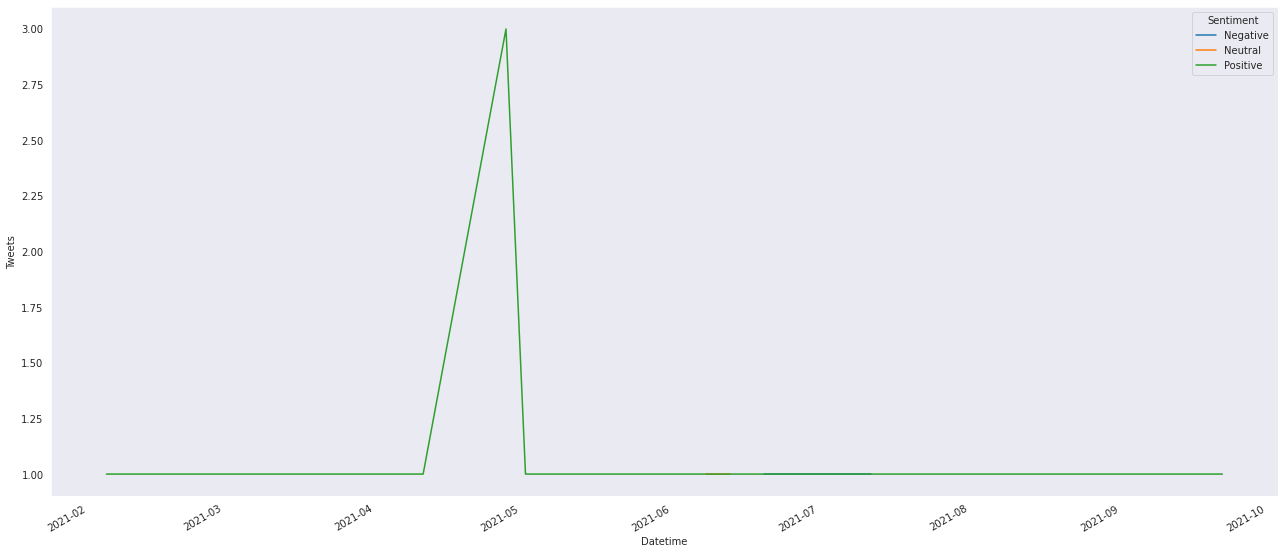

In [ ]:
df1["Datetime"] = pd.to_datetime(df1.Datetime) 
timeline = df1.resample('D', on='Datetime')["Sentiment"].value_counts().unstack(1)
timeline.reset_index(inplace=True)
timeline = timeline.melt("Datetime", var_name='Sentiment',  value_name='Tweets')

plt.figure(figsize=(22,10))
ax = sns.lineplot(x="Datetime", y="Tweets", hue="Sentiment", data=timeline)
ax.figure.autofmt_xdate()